In [39]:
import pandas as pd
import numpy as np

Строка names содержит имена в формате 'Name1 Surname1, Name2 Surname2, …'.
Поместите в переменную names_list список со строками имён – ['Name1 Surname1', 'Name2 Surname2', …]

In [ ]:
names_list = names.split(', ')

В переменной df содержатся данные следующего вида:




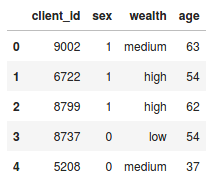

Отберите из них только те, где wealth принимает значение 'medium', а возраст составляет больше 35. Поместите результат в переменную medium_35.

In [20]:
df = pd.DataFrame(
    {'client_id': [9002, 6722, 8799, 8737, 5208],
     'sex': [1, 1, 1, 0, 0],
     'wealth': ['medium', 'high', 'high', 'low', 'medium'],
     'age': [63, 54, 62, 54, 37]
     }
)

medium_35 = df.query('wealth == "medium" & age > 35')


Ваш коллега-новичок перепутал названия колонок в таблице df из предыдущих заданий и прислал вам такой вариант:

Воспользуйтесь методом rename и приведите таблицу к более каноничному виду, сохранив её в ту же самую переменную df.



In [ ]:
df = df.rename(columns={'Клиент id': 'client_id', 'Пол': 'sex', 'Благосостояние': 'wealth', 'Возраст': 'age'})

Добавьте в исследуемый нами датафрэйм df колонку older_than_30, в которой будет храниться информация о том, старше ли клиент 30 лет или нет (булево значение).

In [ ]:
df['older_than_30'] = df['age'] > 30

А теперь получите серию с числом уникальных значений для каждой колонки и присвойте её переменной unique_num

In [17]:
count = {c: len(df[c].unique()) for c in df.columns}
unique_num = pd.Series(data=count, index=df.columns)
unique_num

client_id    5
sex          2
wealth       3
age          4
dtype: int64

У нас появились новые данные! Переменная data хранит в себе датафрейм следующего вида:

Проведите inner join датафрейма data с df из предыдущего шага, объединив их по колонке client_id, и поместите результат в переменную full_data (да, придумывать названия переменных иногда бывает сложно).

In [22]:
data = pd.DataFrame(
    {'client_id': [9002, 9581, 7250, 8619, 6573],
     'amount': [42331, 88420, 1714, 80572, 57549],
     'date': [1585425830, 1585429536, 1585427761, 1585427077, 1585426290]
     }
)
data


,client_id,amount,date
0,9002,42331,1585425830
1,9581,88420,1585429536
2,7250,1714,1585427761
3,8619,80572,1585427077
4,6573,57549,1585426290


In [23]:
df.merge(data, how = 'inner', on = 'client_id')

,client_id,sex,wealth,age,amount,date
0,9002,1,medium,63,42331,1585425830


А теперь создадим свою собственную функцию! Напишите функцию read_n_agg, которая:

    принимает на вход один параметр – путь к файлу
    считывает переданный файл, в котором разделителем является ;
    считает средний заработок (income) по каждой компании (company), перенося колонку company в индекс (as_index=True)
    возвращает результат этих действий (агрегированный датафрэйм)

Данные выглядят вот так, скачать можно отсюда.

P.S. Небольшое уточнение – менять что-то в данных или переименовывать колонки не нужно.

In [30]:
pd.read_csv('https://stepik.org/media/attachments/lesson/359209/companies.csv', sep=';')

,company,income,date
0,"ЗАО «Доронин, Колобов и Калашникова»",1221331958,2019-09-09
1,ООО «Авдеев»,21116804375,1972-12-21
2,РАО «Аксенов Сорокина»,79257158759,2007-03-05
3,Ларионов Инкорпорэйтед,36799366126,2011-08-11
4,Григорьев Инкорпорэйтед,48201837498,1989-09-02
...,...,...,...
288,Сэтл групп,6152279994,2004-03-30
289,ОАО «Горшков Чернов»,26623978007,2004-03-30
290,НПО «Фадеев»,84314056422,1998-09-03
291,Петролеум Трейдинг,95528839292,1975-01-31


In [65]:
def read_n_agg(url):
  comp = pd.read_csv(url, sep=';')
  return comp.groupby('company').agg({'income': 'mean'})
res = read_n_agg('https://stepik.org/media/attachments/lesson/359209/companies.csv')

In [66]:
res

,income
company,
En +,9.962187e+10
"АО «Александрова, Савельев и Мельникова»",7.206782e+10
АО «Андреев-Анисимов»,6.931948e+09
АО «Андреев-Макарова»,8.934380e+10
АО «Большаков Кошелева»,7.860861e+10
...,...
Щекиноазот,4.309092e+10
Щукин Лимитед,6.703036e+10
Эйвон Бьюти Продактс Компани (Avon),2.503657e+10
